# Imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, HTML
from IPython.display import Image as IPImage
import math

# Orbital Motion

/var/folders/n4/yygqk1bx3bj26nqnx472qfn80000gn/T/ipykernel_4973/857639241.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  bodies_plot[body.name].set_data(pos[0], pos[1])
/var/folders/n4/yygqk1bx3bj26nqnx472qfn80000gn/T/ipykernel_4973/857639241.py:36: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  bodies_plot[body.name].set_data(pos[0], pos[1])


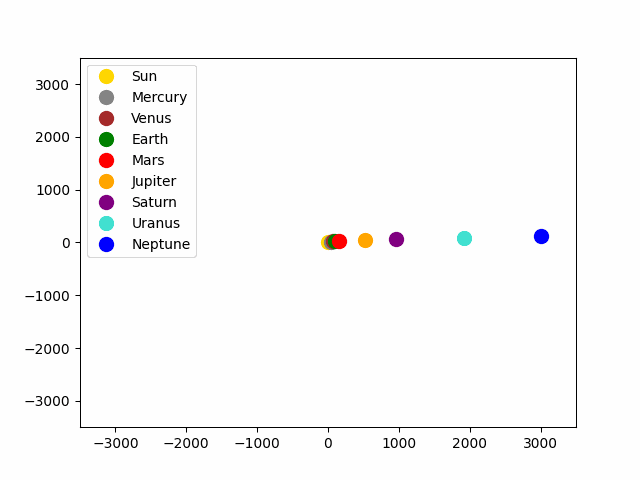

In [3]:
class CelestialBody:
    def __init__(self, name, mass, radius, distance, velocity, color):
        self.name = name
        self.mass = mass
        self.radius = radius
        self.distance = distance
        self.velocity = velocity
        self.color = color
        self.angle = 0

    def update_position(self):
        x = self.distance * math.cos(math.radians(self.angle))
        y = self.distance * math.sin(math.radians(self.angle))
        return x, y

    def move(self, time_step):
        self.angle += self.velocity * time_step

class SolarSystem:
    def __init__(self):
        self.bodies = []

    def add_body(self, body):
        self.bodies.append(body)

    def move_bodies(self, time_step):
        for body in self.bodies:
            body.move(time_step)

def update(frame, solar_system, bodies_plot):
    solar_system.move_bodies(0.1)
    positions = [body.update_position() for body in solar_system.bodies]

    # Update the position and color of each celestial body in the plot
    for body, pos in zip(solar_system.bodies, positions):
        bodies_plot[body.name].set_data(pos[0], pos[1])
        bodies_plot[body.name].set_color(body.color)

    return list(bodies_plot.values())


def display_gif(filename='solar_system_simulation.gif'):
    with open(filename, 'rb') as f:
        display(IPImage(data=f.read(), format='gif'))

def main():
    # Create solar system
    solar_system = SolarSystem()

    # Create celestial bodies
    #body name, mass (kg), radius (km), distance from sun (au*100), relative velocity (km/s), color
    sun = CelestialBody("Sun", 1.989e30, 6.957e6, 0, 0, 'gold')
    mercury = CelestialBody("Mercury", 3.285e23, 2.440e3, 39, 47.87, 'gray')
    venus = CelestialBody("Venus", 4.867e24, 6.051e3, 72, 35.02, 'brown')
    earth = CelestialBody("Earth", 5.972e24, 6.371e3, 100, 29.78, 'green')
    mars = CelestialBody("Mars", 6.4171e23, 3.390e3, 152, 24.08, 'red')
    jupiter = CelestialBody("Jupiter", 1.898e27, 6.991e5, 520, 13.06, 'orange')
    saturn = CelestialBody("Saturn", 5.683e26, 5.823e5, 958, 9.68, 'purple')
    uranus = CelestialBody("Uranus", 8.681e25, 2.536e5, 1922, 6.80, 'turquoise')
    neptune = CelestialBody("Neptune", 1.024e26, 2.462e5, 3005, 5.43, 'blue')
    bodies = [sun, mercury, venus, earth, mars, jupiter, saturn, uranus, neptune]

    legend_handles = []
    legend_labels = []
    
    # Create a plot
    fig, ax = plt.subplots()
    ax.set_xlim(-3500, 3500)
    ax.set_ylim(-3500, 3500)
    # ax.set_aspect('equal', adjustable='box')
    
    # Add bodies to the solar system
    for body in bodies:
        solar_system.add_body(body)
        legend_handles.append(ax.plot([], [], 'o', markersize=10, color=body.color)[0])
        legend_labels.append(body.name)

    # Plot celestial bodies
    bodies_plot = {body.name: ax.plot([], [], 'o', markersize=10)[0] for body in solar_system.bodies}

    # Legend
    ax.legend(legend_handles, legend_labels, loc='upper left')
    
    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=range(1000), fargs=(solar_system, bodies_plot),
                              blit=True, interval=50)

    # Save the animation as a GIF
    ani.save('solar_system_simulation.gif', writer='pillow')
    plt.close(fig)
    display_gif()

if __name__ == "__main__":
    main()